In [1]:
import numpy as np
import xarray as xr
import glob
import cartopy
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = '/home/jt1187/facts/myexperiment/output/'

fnames = glob.glob(path+'myexperiment.total.workflow.*.nc')
wf_id = [fname.split('.')[3] for fname in fnames]

In [3]:
ddict = {s:{} for s in wf_id}
for s in ddict:
    ddict[s] = xr.open_mfdataset(path+'myexperiment.total.workflow.%s.*.nc'%s)

## Global sea level

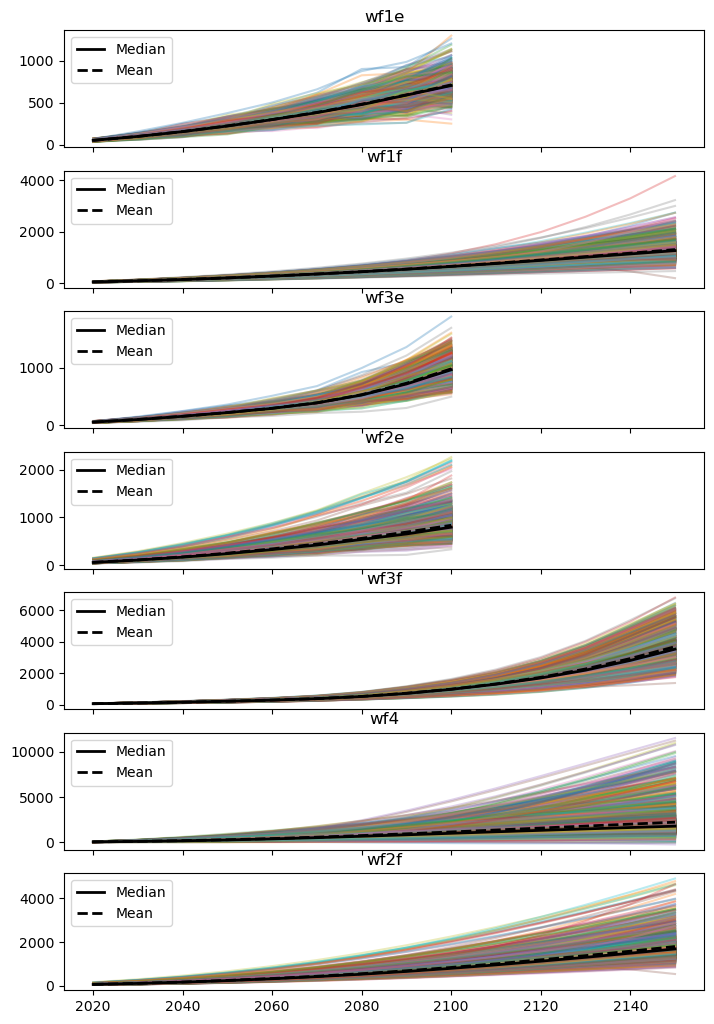

In [4]:
fig, axs = plt.subplots(len(ddict), 1, sharex=True, figsize=(8,12))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.2)
for idx, s in enumerate(ddict):
    ds = ddict[s].isel(locations=0)
    for i in ds.samples:
        ds.sea_level_change.sel(samples=i).squeeze().plot(ax=axs[idx], alpha=0.3,_labels=None)
    ds.sea_level_change.median('samples').plot(ax=axs[idx], c='k', lw=2,_labels=None,label='Median')
    ds.sea_level_change.mean('samples').plot(ax=axs[idx], c='k', lw=2,ls = '--',_labels=None,label='Mean')
    #axs[idx].set_ylim([-100,300])
    axs[idx].set_title(s)
    axs[idx].legend(loc='upper left')
plt.show()

## Local sea level

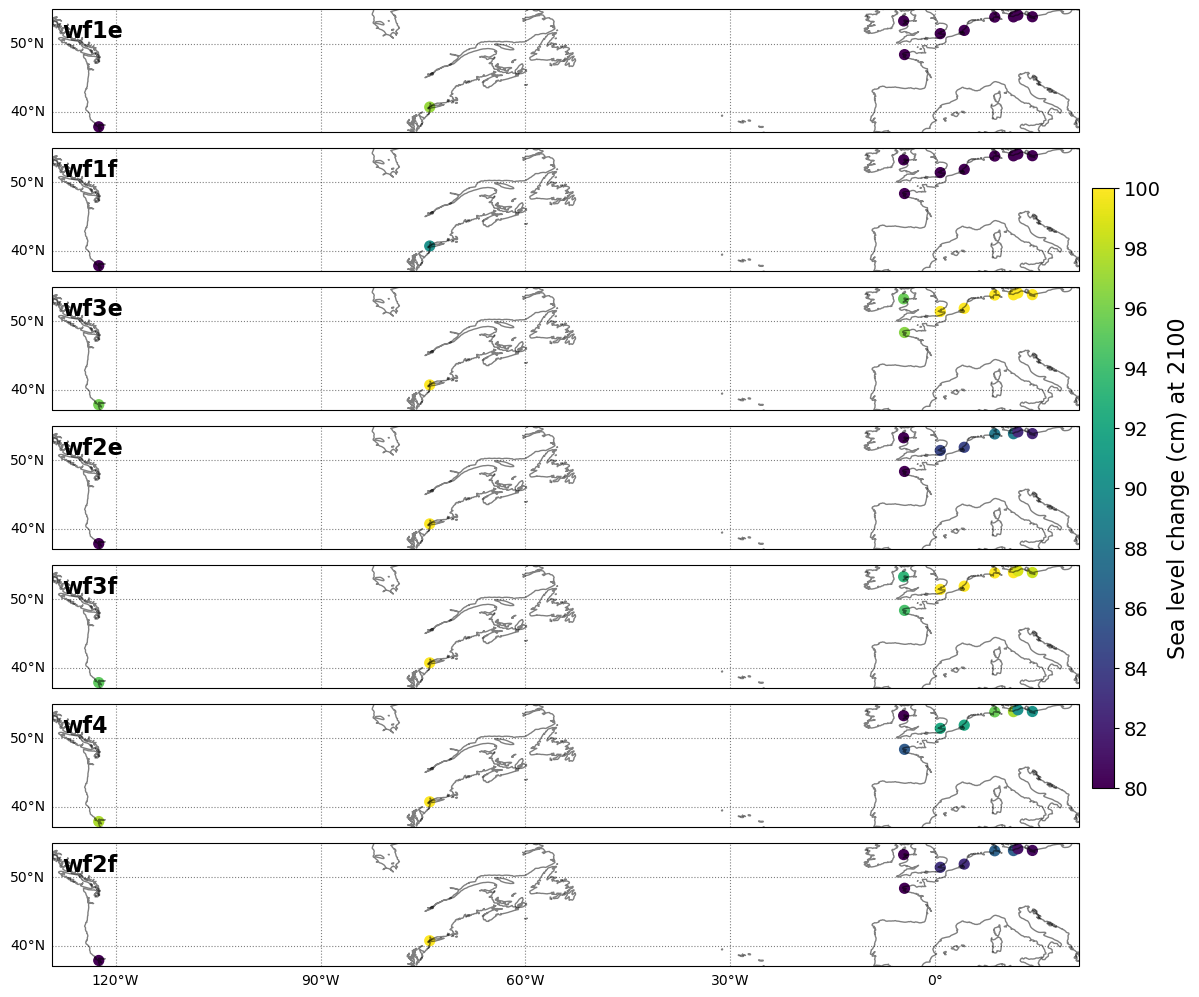

In [11]:
yr = 2100
fig, ax = plt.subplots(len(ddict),1, sharex=True, sharey=False, figsize=(13,12),
                       subplot_kw=dict(projection=cartopy.crs.PlateCarree()))
fig.subplots_adjust(left=0.1, right=0.89, bottom=0.1, top=0.9, hspace=0.1, wspace=0.1)

for i, s in enumerate(ddict):
    #print('Map sea level change for workflow',s)
    ds = ddict[s].isel(locations=slice(1,None)).sel(years=yr)
    ax[i].add_feature(cartopy.feature.COASTLINE.with_scale('50m'), alpha=0.5)
    p = ax[i].scatter(ds.lon.values, ds.lat.values, transform=cartopy.crs.PlateCarree(),
                      c=ds.median('samples').sea_level_change.values/10, s=50, vmin=80, vmax=100)
    
    gl = ax[i].gridlines(linestyle=':', color='k', alpha=0.5, draw_labels=True, x_inline=False, y_inline=False)
    gl.xlocator = mticker.FixedLocator(np.arange(-180,180,30))
    gl.ylocator = mticker.FixedLocator(np.arange(-90,90,10))
    gl.top_labels = False
    gl.right_labels = False
    if i != len(ddict)-1:
        gl.bottom_labels = False
    ax[i].text(0.01,0.92, s, fontsize=16, fontweight='bold', transform=ax[i].transAxes,
               va='top', ha='left')

    
# Add separate colorbar
cax = fig.add_axes([0.90, 0.25, 0.017, 0.5])
cb = fig.colorbar(p, cax=cax, shrink=0.8, pad=0.05, ticks=np.linspace(80,100,11), orientation='vertical')
cb.set_label('Sea level change (cm) at 2100', fontsize=16)
cb.ax.tick_params(labelsize=14)
plt.show()

In [13]:
west, east, south, north = -15, 30, 40, 60
wf_id = 'wf2f'
ds = ddict[wf_id].isel(locations=slice(1,None)).sel(years=yr)

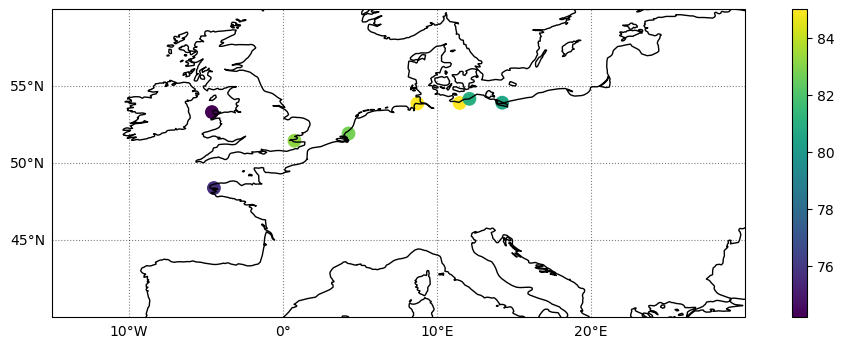

In [24]:
fig = plt.figure(figsize=[12, 4])
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_extent([west, east, south, north], cartopy.crs.PlateCarree())
#ax.add_feature(cartopy.feature.GSHHSFeature(scale = 'intermediate', edgecolor='k',facecolor='grey'),zorder=2)
ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))

# Add sites
#ax.plot(ds.lon.values, ds.lat.values, transform=cartopy.crs.PlateCarree(),
#        marker='o', color='r', markersize=5, linestyle='')
p = ax.scatter(ds.lon.values, ds.lat.values, transform=cartopy.crs.PlateCarree(),
               c=ds.median('samples').sea_level_change.values/10, s=80, vmax=85)
fig.colorbar(p)  
gl = ax.gridlines(linestyle=':', color='k', alpha=0.5, draw_labels=True, x_inline=False, y_inline=False)
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,5))
gl.top_labels = False
gl.right_labels = False
plt.show()

In [41]:
wf_id = 'wf2f'
ds = ddict[wf_id].isel(locations=slice(1,None))

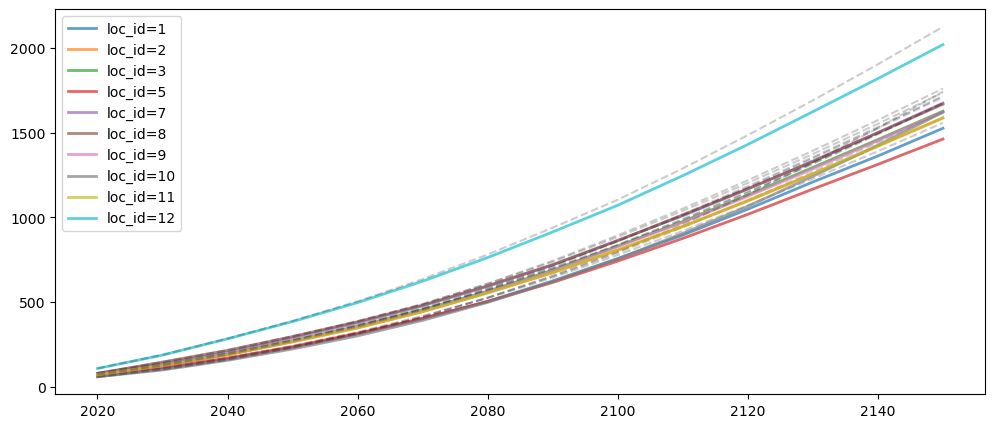

In [49]:
fig, ax = plt.subplots(figsize=(12,5))
for i in ds.locations.values:
    ds.sea_level_change.sel(locations=i).median('samples').squeeze().plot(ax=ax, alpha=0.7,lw=2,
                                                                          _labels=None,label='loc_id=%i'%i)
    ds.sea_level_change.sel(locations=i).mean('samples').squeeze().plot(ax=ax, c='k', alpha=0.2,ls='--',_labels=None)
    
ax.legend()
plt.show()

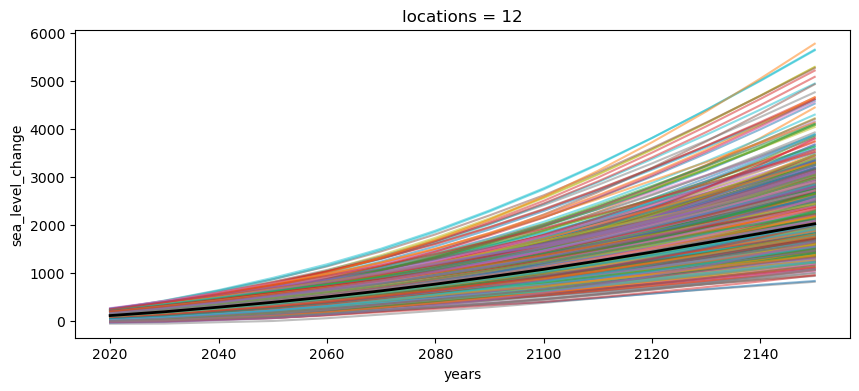

In [57]:
i=12
fig, ax = plt.subplots(figsize=(10,4))
for sidx in ds.samples:
    ds.sea_level_change.sel(locations=i, samples=sidx).plot(ax=ax, alpha=0.5)
    
ds.sea_level_change.sel(locations=i).median('samples').plot(ax=ax, c='k', lw=2)
plt.show()

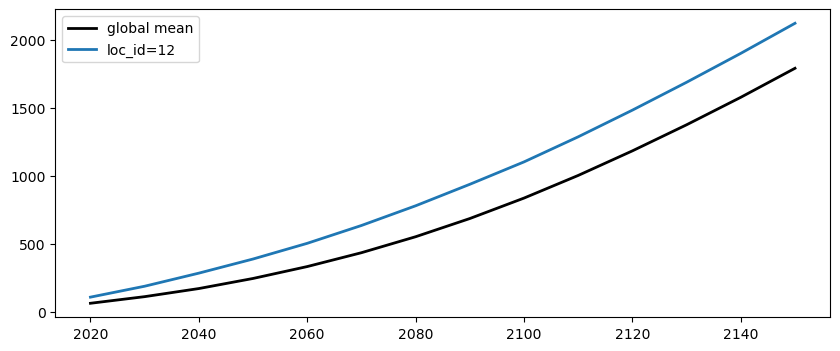

In [56]:
fig, ax = plt.subplots(figsize=(10,4))
ddict[wf_id].sea_level_change.isel(locations=0).mean('samples').plot(ax=ax, c='k', lw=2,_labels=None,
                                                                     label='global mean')
ds.sea_level_change.sel(locations=i).mean('samples').plot(ax=ax, lw=2,_labels=None,label='loc_id=%i'%i)
ax.legend()
plt.show()

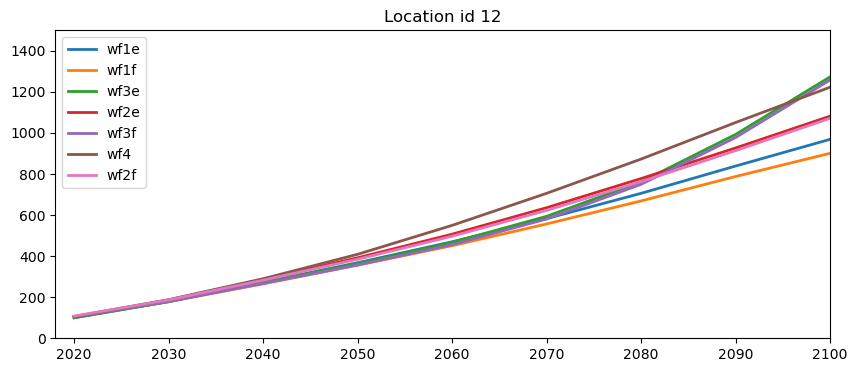

In [62]:
fig, ax = plt.subplots(figsize=(10,4))
for idx, s in enumerate(ddict):
    ddict[s].sea_level_change.sel(locations=i).median('samples').plot(ax=ax, lw=2,_labels=None,label='%s'%s)

ax.legend(loc='upper left')
ax.set_xlim([2018,2100])
ax.set_ylim([0,1500])
ax.set_title('Location id %i'%i)
plt.show()